In [1]:
# грузим помощника google drive
from google.colab import drive

# эта строка попросит авторизироваться
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#путь до папки с лабораторной
prefix='/content/drive/My Drive/lab5/'

``# Исторические данные о президентах стран

Набор данных «Правители, выборы и нерегулярное управление» (REIGN) описывает политические условия в каждой стране каждый месяц. Эти условия включают срок полномочий и личные характеристики мировых лидеров, типы политических институтов и действующих политических режимов, результаты выборов и объявления о выборах, а также нерегулярные события, такие как перевороты, попытки переворота и другие насильственные конфликты ». Последний набор данных охватывает 200 стран, с 1950 года по настоящее время, и включает в себя десятки переменных для каждого ежемесячного снимка.

Данные взяты [отсюда](https://oefresearch.org/datasets/reign). Описание всех полей в оригинале можно найти [тут](https://cdn.rawgit.com/OEFDataScience/REIGN.github.io/gh-pages/documents/reign_codebook.pdf).

*Дисклеймер. Информация предоставлена исключительно в целях обучения студентов работе с большими наборами данных. Содержание файлов не несет в себе никакой смысловой нагрузки и не преследует никаких политиечских целей. Ответственность за содержимое несут исключительно авторы сайта oefresearch.org.*

Поля, описывающие данные (Внимание!! Представлен приблизительный перевод. Оригинал можно найти в [документации](https://cdn.rawgit.com/OEFDataScience/REIGN.github.io/gh-pages/documents/reign_codebook.pdf)):

* `ccode` - число от 1 до 3 символов - уникальный ИД одной из 201 рассмотренных стран
* `country` - название страны
* `leader` - имя / фамилия лидера
* `year` - календарный год от 1950 до 2019
* `month` - месяц, число от 1 до 12
* `elected` - 1 для даты, когда проходили выборы президента, иначе 0
* `age` - возраст президента
* `male` - 1 если мужчина, 0 если женщина
* `militarycareer` - 1 если правитель в истории своей карьеры работал в силовых структурах (армия, полиция, спецслужбы, ...)
* `tenure_months` - количество месяцев сколько человек у власти
* `government` - один из 16 типов правления. 
    * Presidential Democracy - демократия, при которой основными полномочиями наделен президент
    * Parliamentary Democracy - демократия, при которой парламент более полномочен чем президент
    * Personalist Systems - власть в руках одного человека - не монарха
    * Monarchies - монархия
    * Single-Party Systems - власть принадлежит одной пардити.
    * Oligarchies - Власть принадлежит одному человеку, либо партии, в которой этот человек стоит во главе. Человек представляет интересы элиты.
    * Party-Personalist Hybrids - среднее между партией и диктаторством, когда власть принадлежит партии, но полностью подконтрольной одному человеку
    * Military Juntas - во главе стоит военный, но его действия проверяются другими военными службами
    * Indirect Military Juntas - по факту власть принадлежит военным, но по факту ими правят гражданские лица
    * Personalist-Military Hybrids - смесь военной и диктаторской системы
    * Party-Military Hybrids - смесь военной и партийной власти
    * Party-Personalist-Military Hybrids - смесь диктаторской и партийной власти
    * Warlordism - для стран, в которых военное положение разрушило основную форму правления.
    * Foreign-Occupied - когда зарубежные силы захватывают власть
    * Civilian Provisional или Military Provisional - временные режимы правления, которые закрепляются в стране на время перехода к демократии (обычно) либо следуют за переворотами и конституционными кризисами.
* `anticipation` - ожидание. Значение равно 1 если в течение следующих шести месяцев ожидаются перевыборы. Для тех стран, где выборы происходят не через регулярные промежутки времени
* `ref_ant` - 1 если в течение следующих 6 месяцев ожидается референдум
* `leg_ant` - 1 если в течение следующих 6 месяцев ожидаются выборы, предписанные основным законом страны
* `exec_ant` - 1 если в течение следующих 6 месяцев ожидаются квалификационные выборы
* `irreg_lead_ant` - 1 если в течение следующих нескольких месяцев ожидаются внеочередные выборы
* `election_now` - 1 если выборы проходят в текущем месяце
* `election_recent` - 1 если выборы прошли менее 6 месяцев назад
* `leg_recent`, `exec_recent`, `lead_recent`, `ref_recent`, `direct_recent`, `indirect_recent` - 1 устанавливается в течение 6 месяцев после выборов разных типов власти 
* `victory_recent` - 1 в течение 6 месяцев после повторной победы правящей патии либо лидера
* `defeat_recent` - 1 в течение 6 месяцев после поражения правящей патии либо лидера (если сменилось правление)
* `change_recent` - 1 в течение 6 месяцев после выборов, которые повлекли за собой смену власти
* `nochange_recent` - 1 в течение 6 месяцев после выборов, которые не повлекли за собой смену власти
* `delayed` - 1 следующие 6 месяцев после выборов, которые были отменены либо задержаны на два или более месяца
* `lastelection` - количество месяцев с момента последних прошедших отборов (выборы на высшую должность или референдум, который расширит исполнительную власть), или, в отсутствие предыдущих выборов, количество месяцев с момента последнего изменения политической системы.
* `loss` - это количество месяцев с момента, когда действующая политическая партия или лидер в последний раз проиграли выборы или, в отсутствие предыдущих потерь, количество месяцев с момента последнего изменения политической системы
* `irregular` - аналогично loss, но с момента последнего переворота в стране
* `prev_conflict` - 
* `pt_suc` - 1 если в этом месяце произошел успешный переворот с лидером
* `pt_attempt` - 1 если в этом месяце произошла попытка переворота против лидера
* `precip` - (нет в документации)
* `couprisk` - риск переворота в стране в текущем месяце
* `pctile_risk` - тот же риск, в процентах

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 38)
df = pd.read_csv("REIGN_2019_4.csv")

In [2]:
df.shape

(133161, 38)

In [5]:
df.head(3).T

,0,1,2
ccode,2,2,2
country,USA,USA,USA
leader,Truman,Truman,Truman
year,1950,1950,1950
month,1,2,3
elected,1,1,1
age,66,66,66
male,1,1,1
militarycareer,0,0,0
tenure_months,58,59,60


#### 1. Сколько форм правления (government) представлено в наборе?

In [6]:
# Ваш код здесь
df.government.unique()

array(['Presidential Democracy', 'Parliamentary Democracy',
       'Personal Dictatorship', 'Party-Personal',
       'Provisional - Military', 'Military', 'Military-Personal',
       'Provisional - Civilian', 'Foreign/Occupied', 'Dominant Party',
       ' ', 'Indirect Military', 'Party-Military',
       'Party-Personal-Military Hybrid', 'Oligarchy', 'Monarchy',
       'Warlordism'], dtype=object)

#### 2. Каков средний возраст правителей? 

In [3]:
# Ваш код здесь
one_leader = df.sort_values(by=["year"]).groupby("leader").last()
one_leader = one_leader[["age", "male"]]

one_leader.age.mean()

59.4446583253128

#### 3. Процентное соотношение мужчин и женщин среди правителей (без учета срока правления)

In [53]:
# Ваш код здесь
one_leader.groupby("male").size() / len(one_leader)

male
0.0    0.035611
1.0    0.964389
dtype: float64

#### 4. Процентное соотношение мужчин и женщин с учетом срока правления 

In [4]:
# Ваш код здесь
one_leader["month_government"] = df.groupby("leader").size()

one_leader.groupby("male").sum().month_government / one_leader.month_government.sum()

male
0.0    0.030677
1.0    0.969323
Name: month_government, dtype: float64

#### 5. Каковы средние значения и среднеквадратичные отклонения правителей которые правят более 10 лет (120 месяцев) и менее 120 месяцев?

In [55]:
# Ваш код здесь
more = one_leader[one_leader.month_government > 120].reset_index()
less = one_leader[one_leader.month_government < 120].reset_index()

df[df.leader.isin(more.leader)].describe()
df[df.leader.isin(less.leader)].describe()


,ccode,year,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
count,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,60054.000000,44539.000000,44539.000000
mean,421.629533,1990.034253,6.480834,0.623672,56.539348,0.964698,0.148783,30.215906,0.122873,0.009242,0.056549,0.058581,0.021614,0.025477,0.136028,0.071402,0.056716,0.128118,0.010740,0.127852,0.006944,0.067989,0.066340,0.085573,0.048673,0.009974,3.030350,3.882562,4.956030,0.175359,0.002981,0.005295,-0.005764,0.002488,0.464915
std,284.035828,20.320962,3.460055,0.484468,9.917573,0.184542,0.355877,27.873841,0.328294,0.095689,0.230981,0.234840,0.145420,0.157570,0.342821,0.257498,0.231300,0.334224,0.103078,0.333927,0.083040,0.251729,0.248878,0.279735,0.215185,0.099373,1.118140,1.394483,1.585748,0.561925,0.054514,0.072576,0.768720,0.005639,0.309056
min,2.000000,1950.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.759650,0.000006,0.000021
25%,160.000000,1974.000000,3.000000,0.000000,50.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484907,3.091043,3.951244,0.000000,0.000000,0.000000,-0.455768,0.000296,0.189458
50%,366.000000,1993.000000,6.000000,1.000000,57.000000,1.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218876,3.891820,5.170484,0.000000,0.000000,0.000000,-0.009780,0.000624,0.429245
75%,666.000000,2008.000000,10.000000,1.000000,63.000000,1.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.713572,4.744932,6.084499,0.000000,0.000000,0.000000,0.454441,0.001792,0.732579
max,990.000000,2019.000000,12.000000,1.000000,94.000000,1.000000,1.000000,364.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.134094,8.345455,8.521783,9.000000,1.000000,1.000000,3.663106,0.159869,1.023614


#### 6. Правда ли, что каждый 10 правитель (10% лидеров) оставались у власти более чем на 1 срок?

In [56]:
# Ваш код здесь

# tenure resets every time a leader leaves and reenters office
# The inauguration month takes a value of 1.

df_ = df.sort_values(by="year")

term = df_[df_.tenure_months == 1].groupby("leader").sum()

term[term.tenure_months > 1].shape[0] > one_leader.shape[0] * 0.1

True

#### 7. Выведите статистику возраста и пола для каждой из страны. Используйте groupby и describe. Найдите таким образом максимальный и минимальный возраст лидеров США.

In [57]:
# Ваш код здесь
select_col = ['age', 'male']

static_m_a = df.groupby('country')[select_col].describe()

print(static_m_a.loc['USA', :]['age'][['max', 'min']])
static_m_a.head()

max    78.0
min    44.0
Name: USA, dtype: float64


age                                                       male  \
             count       mean        std   min   25%   50%   75%   max  count   
country                                                                         
Afghanistan  848.0  52.308962   8.460970  37.0  47.0  51.0  57.0  70.0  848.0   
Albania      841.0  56.877527  10.640801  30.0  50.0  57.0  65.0  77.0  841.0   
Algeria      690.0  58.724638  11.776072  38.0  49.0  57.0  68.0  82.0  690.0   
Andorra      455.0  55.545055   5.295420  40.0  52.0  55.0  59.0  66.0  455.0   
Angola       524.0  56.423664  10.402047  37.0  48.0  56.0  65.0  75.0  524.0   

                                                
            mean  std  min  25%  50%  75%  max  
country                                         
Afghanistan  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Albania      1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Algeria      1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Andorra      1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Angola       1.0  0.0  1.0  1.0  1.0  1.0  1.0

#### 8. Посчитайте среднегодовой риск переворота (couprisk) в стране для каждого лидера. Для кого и в каком году он был максимальным? А минимальным?

In [25]:
# Ваш код здесь

# not working
# risk = df.groupby(['leader', 'year'])
# 
# risk.loc[ 'Yeltsin']
# df[df.leader == 'Yeltsin'].head()

# risk[risk.country == 'Russia'].head()
# df[df.country == 'Russia']
# risk.loc[risk.idxmax()]

# risk.loc[risk.idxmin()]

,ccode,month,elected,age,male,militarycareer,tenure_months,anticipation,ref_ant,leg_ant,exec_ant,irreg_lead_ant,election_now,election_recent,leg_recent,exec_recent,lead_recent,ref_recent,direct_recent,indirect_recent,victory_recent,defeat_recent,change_recent,nochange_recent,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991.0,0.0,1.581139,0.0,0.0,0.0,0.0,1.581139,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.547723,0.000000,0.0,0.000000,0.0,0.0,0.547723,0.0,0.334638,0.334638,0.334638,0.000000,0.0,0.0,0.080131,0.002660,0.021173
1992.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.280413,0.280413,0.280413,0.000000,0.0,0.0,0.109803,0.002172,0.039439
1993.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.679386,0.492366,0.492366,0.0,0.000000,0.000000,0.389249,0.522233,0.0,0.000000,0.000000,0.522233,0.522233,0.0,0.522233,0.0,0.0,0.522233,0.0,1.081237,0.143235,1.081237,0.288675,0.0,0.0,0.069974,0.001331,0.141555
1994.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.522233,0.0,0.000000,0.000000,0.522233,0.522233,0.0,0.522233,0.0,0.0,0.522233,0.0,0.585470,0.096719,0.585470,0.288675,0.0,0.0,0.168717,0.000890,0.208250
1995.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.288675,0.000000,0.0,0.288675,0.288675,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.189097,0.073086,0.189097,0.000000,0.0,0.0,0.071236,0.001267,0.161047
1996.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.514929,0.000000,0.0,0.514929,0.514929,0.389249,0.522233,0.0,0.522233,0.522233,0.000000,0.522233,0.0,0.514929,0.0,0.0,0.514929,0.0,1.345484,0.058755,1.345484,0.492366,0.0,0.0,0.107131,0.001626,0.148876
1997.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.288675,0.0,0.288675,0.288675,0.000000,0.288675,0.0,0.288675,0.0,0.0,0.288675,0.0,0.305545,0.049130,0.305545,0.000000,0.0,0.0,0.283552,0.000881,0.116435
1998.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.149246,0.042218,0.149246,0.000000,0.0,0.0,0.165212,0.000094,0.030314
1999.0,0.0,3.605551,0.0,0.0,0.0,0.0,3.605551,0.492366,0.000000,0.0,0.492366,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.099402,0.037012,0.099402,0.674200,0.0,0.0,0.193125,0.001183,0.131991


#### 9. При какой форме правления чаще всего проходили государственные перевороты? 

In [59]:
# Ваш код здесь

# pt_success is equal to 1 if a successful coup occurred against the leader that month.

coup = df[df.pt_suc == 1].groupby('government').count()[['pt_suc']]

coup.loc[coup.idxmax()]

,pt_suc
government,
Personal Dictatorship,46


#### 10. Постройте корелляцию принадлежности президента к силовым структурам (militarycareer) от формы правления (government). Для выполения сперва сгруппируйте данные по лидерам, потом используйте crosstab.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cross']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


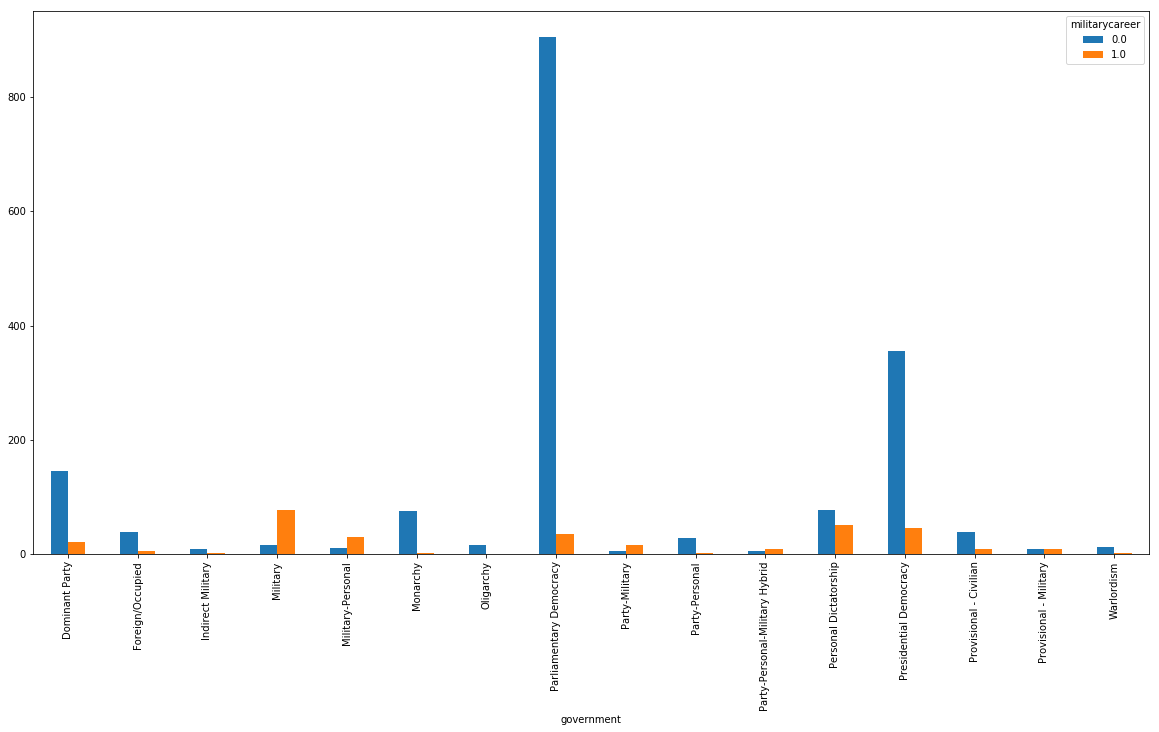

In [95]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = 20, 10

m = df.groupby("leader").last()

cross = pd.crosstab(m.government, m.militarycareer)

cross.plot(kind='bar')